## First, go to "Runtime" ->"change runtime type"->select "Python3", and then select "GPU"
- remember to restart runtime after installing deeplabcut


In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
#(this will take a few minutes to install all the dependences!)
!pip install 'deeplabcut[tf]'
%reload_ext numpy
%reload_ext scipy
%reload_ext matplotlib
%reload_ext mpl_toolkits

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.1/112.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.3/296.3 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 

#install other packages and setup
- connect to google drive in this step

In [1]:
#a few colab specific things needed:
!pip install --upgrade scikit-image
!pip3 install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
  Attempting uninstall: imageio
    Found existing installation: imageio 2.25.1
    Uninstalling imageio-2.25.1:
      Successfully uninstalled imageio-2.25.1
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency confli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=256380 sha256=77c7a2bfce3903e8d579cf84546fd7eaf9b558dfa63c01bdbb54d59bdd702549
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


In [1]:
import os
import deeplabcut
import numpy as np
import pandas as pd
import pickle5 as pickle
from deeplabcut.utils import auxfun_multianimal, auxiliaryfunctions
import random
from pathlib import Path
import glob

Loading DLC 2.3.5...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


Link your Google Drive (with your labeled data):

In [2]:
#Now, let's link to your Google Drive. Run this cell and follow the authorization instructions:
#(We recommend putting a copy of the github repo in your google drive if you are using the demo "examples")

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#setup paths

In [16]:
project_path = "/content/drive/MyDrive/training/demo-me-2021-07-14/"
config_path = project_path + "config.yaml"
pose_config_path = "/content/drive/MyDrive/training/demo-me-2021-07-14/dlc-models/iteration-0/demoJul14-trainset95shuffle0/train/pose_cfg.yaml"
test_pose_config_path = "/content/drive/MyDrive/training/demo-me-2021-07-14/dlc-models/iteration-0/demoJul14-trainset95shuffle0/test/pose_cfg.yaml"

# don't include suffix
snapshot_path = "/content/drive/MyDrive/training/demo-me-2021-07-14/dlc-models/iteration-0/demoJul14-trainset95shuffle0/train/snapshot-20000"

print(config_path)
print(pose_config_path)

/content/drive/MyDrive/training/demo-me-2021-07-14/config.yaml
/content/drive/MyDrive/training/demo-me-2021-07-14/dlc-models/iteration-0/demoJul14-trainset95shuffle0/train/pose_cfg.yaml


In [17]:
TRACK_METHOD = "ellipse"  # Could also be "box", but "ellipse" was found to be more robust on this dataset.

In [18]:
SHUFFLE = 1 #edit if needed; 1 is the default.
DISPLAYITERS=1000
SAVEITERS=10000
MAXITERS=75000

In [19]:
new_pose_config_path = "/content/drive/MyDrive/training/demo-me-2021-07-14/dlc-models/iteration-0/demoJul14-trainset95shuffle1/train/pose_cfg.yaml"
new_test_pose_config_path = "/content/drive/MyDrive/training/demo-me-2021-07-14/dlc-models/iteration-0/demoJul14-trainset95shuffle1/test/pose_cfg.yaml"


# Create training dataset
- delete training-datasets folder contents prior to running
- may need to run twice/make sure training-datasets folder exists already

In [ ]:
deeplabcut.create_multianimaltraining_dataset(config_path, Shuffles=[SHUFFLE], net_type="resnet_50", windows2linux=True)

/usr/local/lib/python3.10/dist-packages/deeplabcut/generate_training_dataset/multiple_individuals_trainingsetmanipulation.py:182: FutureWarning: `windows2linux` has no effect since 2.2.0.4 and will be removed in 2.2.1.
  warnings.warn(


Utilizing the following graph: [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], [6, 7], [6, 8], [6, 9], [6, 10], [6, 11], [7, 8], [7, 9], [7, 10], [7, 11], [8, 9], [8, 10], [8, 11], [9, 10], [9, 11], [10, 11]]
Creating training data for: Shuffle: 1 TrainFraction:  0.95


100%|██████████| 348/348 [00:00<00:00, 400.07it/s]

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


# Train network

In [ ]:
#let's also change the display and save_iters just in case Colab takes away the GPU...
#Typically, you want to train to 50,000 - 200K iterations.
#more info and there are more things you can set: https://github.com/DeepLabCut/DeepLabCut/blob/master/docs/functionDetails.md#g-train-the-network

deeplabcut.train_network(config_path, keepdeconvweights=False, shuffle=SHUFFLE, displayiters=DISPLAYITERS, saveiters=SAVEITERS, maxiters=MAXITERS, allow_growth=True)


Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11]],
 'all_joints_names': ['snout',
                      'leftear',
                      'rightear',
                      'shoulder',
                      'spine1',
                      'spine2',
                      'spine3',
                      'spine4',
                      'tailbase',
                      'tail1',
                      'tail2',
                      'tailend'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 8,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'crop_sampling': 'hybrid',
 'crop_size': [400, 400],
 'cropratio': 0.4,
 'dataset': 'training-datasets/ite

Selecting multi-animal trainer
Activating limb prediction...
Batch Size is 8
Getting specs multi-animal-imgaug 66 12


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Loading ImageNet-pretrained resnet_50
Max_iters overwritten as 75000
Display_iters overwritten as 1000
Save_iters overwritten as 10000
Training parameters:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/content/drive/MyDrive/training/demo-me-2021-07-14/dlc-models/iteration-2/demoJul14-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'adam', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 8, 'dataset_type': 'multi-animal-imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': True, 'pairwise_predict': True, 

iteration: 1000 loss: 0.0234 scmap loss: 0.0212 locref loss: 0.0004 limb loss: 0.0017 lr: 0.0001
iteration: 2000 loss: 0.0087 scmap loss: 0.0081 locref loss: 0.0002 limb loss: 0.0005 lr: 0.0001
iteration: 3000 loss: 0.0074 scmap loss: 0.0068 locref loss: 0.0001 limb loss: 0.0004 lr: 0.0001
iteration: 4000 loss: 0.0067 scmap loss: 0.0063 locref loss: 0.0001 limb loss: 0.0003 lr: 0.0001
iteration: 5000 loss: 0.0063 scmap loss: 0.0059 locref loss: 0.0001 limb loss: 0.0003 lr: 0.0001
iteration: 6000 loss: 0.0061 scmap loss: 0.0057 locref loss: 0.0001 limb loss: 0.0003 lr: 0.0001
iteration: 7000 loss: 0.0057 scmap loss: 0.0053 locref loss: 0.0001 limb loss: 0.0003 lr: 0.0001
iteration: 8000 loss: 0.0053 scmap loss: 0.0050 locref loss: 0.0001 limb loss: 0.0002 lr: 5e-05
iteration: 9000 loss: 0.0048 scmap loss: 0.0045 locref loss: 0.0001 limb loss: 0.0002 lr: 5e-05
iteration: 10000 loss: 0.0047 scmap loss: 0.0044 locref loss: 0.0001 limb loss: 0.0002 lr: 5e-05
iteration: 11000 loss: 0.0046 sc

# Evaluate network

Running  DLC_resnet50_demoJul14shuffle1_50000  with # of trainingiterations: 50000


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Activating extracting of PAFs
Network Evaluation underway...


324it [00:38, 10.26it/s]/usr/local/lib/python3.10/dist-packages/deeplabcut/pose_estimation_tensorflow/core/evaluate_multianimal.py:361: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["bodyparts"].replace(
/usr/local/lib/python3.10/dist-packages/deeplabcut/pose_estimation_tensorflow/core/evaluate_multianimal.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["sample"] = 0
367it [00:43,  8.38it/s]


Results for 50000 training iterations, training fraction of 95, and shuffle 1:
Train error: 2.21 pixels. Test error: 4.68 pixels.
With pcutoff of 0.2:
Train error: 2.17 pixels. Test error: 4.39 pixels.
##########################################
Average Euclidean distance to GT per individual (in pixels; test-only)
individuals
mus1    3.001887
mus2    6.186088
mus3         NaN
Average Euclidean distance to GT per bodypart (in pixels; test-only)
bodyparts
leftear      3.617234
rightear     3.474624
shoulder     2.508419
snout        3.263412
spine1       2.534780
spine2       3.508360
spine3       3.662152
spine4       4.204017
tail1        4.673393
tail2        9.614577
tailbase     5.044215
tailend     13.294958
Done and results stored for snapshot:  snapshot-50000
Selecting best skeleton...
Graph 1|10


100%|██████████| 367/367 [00:00<00:00, 2315.28it/s]

Graph 2|10



100%|██████████| 367/367 [00:00<00:00, 2185.93it/s]

Graph 3|10



100%|██████████| 367/367 [00:00<00:00, 1837.39it/s]

Graph 4|10



100%|██████████| 367/367 [00:00<00:00, 2128.54it/s]

Graph 5|10



100%|██████████| 367/367 [00:00<00:00, 2307.08it/s]

Graph 6|10



100%|██████████| 367/367 [00:00<00:00, 1392.49it/s]

Graph 7|10



100%|██████████| 367/367 [00:00<00:00, 1332.24it/s]

Graph 8|10



100%|██████████| 367/367 [00:00<00:00, 2341.76it/s]

Graph 9|10



100%|██████████| 367/367 [00:00<00:00, 2272.92it/s]

Graph 10|10



100%|██████████| 367/367 [00:00<00:00, 2209.42it/s]


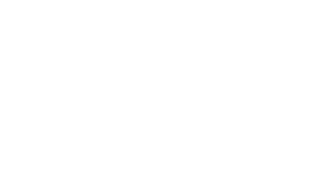

In [21]:
deeplabcut.evaluate_network(config_path,Shuffles=[SHUFFLE], plotting=True)